Project MDI220 - Luiz Augusto Facury de Souza

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

*Exercise 1:*
1. Load data as a vector x = (x1, . . . , xn) of nuclear accident costs before the Three Mile Island accident and remove all missing values. You must get n = 55 observations.

In [2]:
data = pd.read_csv('data/C_id_35_NuclearPowerAccidents2016.csv', sep=',') #Get data
data["Date"] = pd.to_datetime(data["Date"])
data = data[data.Date<'1979-03-28']  #Get data before Three Mile Island accident
data = data.loc[data['Cost (millions 2013US$)'].notnull()] #Remove null values
print(data.shape)
data.head()

(55, 8)


,Date,Location,Cost (millions 2013US$),INES,Smyth Magnitude,Region,Description,Fatalities
4,1957-09-11,"Rocky Flats, USA",8189.0,5.0,5.2,NaN,Fire starts and destroys plutonium processing ...,0
5,1955-03-25,"Sellafield, UK",4400.0,4.0,4.3,WE,Fire releases up to up to a few tenths of a te...,0
6,1977-01-01,"Beloyarsk, USSR",3500.0,5.0,NaN,EE,"Unit 2 suffers a half core meltdown, repairs t...",0
7,1955-07-14,"Sellafield, UK",2900.0,3.0,-2.4,WE,Another radioactive leak and remediation opera...,0
8,1969-10-12,"Sellafield, UK",2500.0,4.0,2.3,WE,Enhanced discharge from the Building B204 stac...,0


2. Let F <sub>θ </sub> be the cumulative distribution function of a Gaussian distribution with mean µ
and variance σ<sup>2</sup> , with θ = (µ, σ<sup>2</sup> ).

(a) Show that the quantile function F<sub>θ</sub><sup>-1</sup> satisfies:
$$\forall p \in (0,1), F_θ^{-1}(p) = σF_{(0,1)}^{-1}(p) + µ$$

The quantile function is the inverse of the cumulative distribution function, so we will need the CDF of a normal distribution, given by:

$$F_θ(x) = \frac{1}{2} + [1 + erf(\frac{(x - µ)}{σ \sqrt(2)})]$$

Where erf is the error function. 


Calculating the inverse of the CDF (Quantile), step by step, we get:

$$F_θ^{-1}(p) = \mu + \sigma \sqrt{2}erf^{-1}(2p-1)$$

Therefore, we have:

$$F^{-1}(p;0,1) = \sqrt{2}erf^{-1}(2p-1)$$
$$F^{-1}(p;\mu,\sigma^2) = \mu + \sqrt{\sigma^2} F^{-1}(p;0,1) , \forall p \in (0,1)$$




(b) Show the Q–Q plot of data for the Gaussian model using the probplot function of
SciPy.


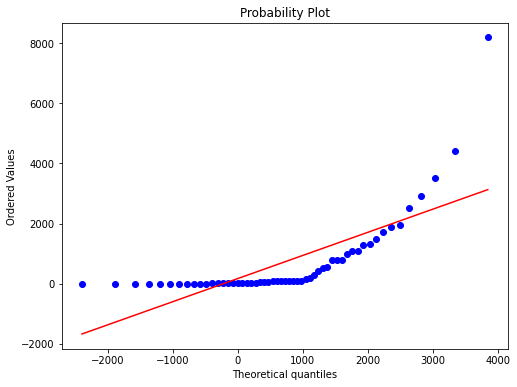

In [3]:
y = data['Cost (millions 2013US$)']  #Target variable
norm = stat.norm.fit(y) #Fit normal distribution to target variable
plt.figure(figsize=(8,6)) 
stat.probplot(y, dist="norm", plot=plt, sparams=norm) #Plot Q-Q plot of target variable against normal distribution
plt.show()

3. Let  F <sub>θ </sub> be the cumulative distribution function of an exponential distribution with pa-
rameter θ > 0.

(a) Show that the quantile function F<sub>θ</sub><sup>-1</sup> satisfies:

$$\forall p \in (0,1), F_θ^{-1}(p) = \frac{1}{θ} F_1^{-1}(p)$$

The CDF of an exponential distribution is given by:
$$y = 1 - e^{-\lambda x}$$

Therefore, the inverse of the CDF (quantile) is given by:
$$q = \frac{-ln(1-x)}{\lambda}$$

Than, we have:

$$F^{-1}(p;1) = -ln(1-x) $$
$$F^{-1}(p;\lambda) = \frac{F^{-1}(p;1)}{\lambda}, \forall p \in (0,1)  $$


(b) Show the Q–Q plot of data for the exponential model.

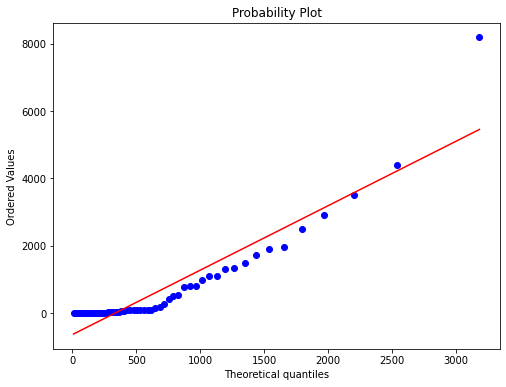

In [7]:
exp = stat.expon.fit(y) #Fit exponential distribution to target variable
plt.figure(figsize=(8,6)) 
stat.probplot(y, dist="expon", plot=plt, sparams=exp) #Plot Q-Q plot of target variable against exp distribution
plt.show()

4. The Q-Q plot tries to determine from which distribution the data came from. The plot is a scatter plot of the quantiles of the data against the quantiles of the candidate distribution. If the data did come from the distribution, the points should lie on a straight line, 45 degrees from the origin.
Therefore, analysing the two plots, we can see that the data is more likely to come from an exponential distribution than an normal distribution, since the plot of the exponential distribution is much closer to the 45 degree line than the plot of the normal distribution, which is more spread out.

In the following, we use the exponential model for the cost of accidents before the
Three Mile Island accident. Specifically, we assume that accident costs are i.i.d. samples of
an exponential distribution with parameter θ > 0. Let Θ = (0, +∞) be the set of parameters.
We denote by X = (X1 , . . . , Xn ) a random vector of n i.i.d. samples.

*Exercise 2 (Point estimation):*

We first focus on the estimation of θ or some functions of θ.

1. Give the maximum likelihood estimator θ̂ of θ.

The PDF of an exponential distribution is given by: 
$$y = \lambda e^{-\lambda x}$$
Therefore, the likelihood function is given by:
$$L(\lambda) = \prod_{i=1}^{n} \lambda e^{-\lambda x_i} = \lambda^n e^{-\lambda \sum_{i=1}^{n} x_i}$$
Taking the log of the likelihood function, we get:
$$\log L(\lambda) = n \log \lambda - \lambda \sum_{i=1}^{n} x_i$$
Taking the derivative of the log likelihood function with respect to $\lambda$, we get:
$$\frac{\partial \log L(\lambda)}{\partial \lambda} = \frac{n}{\lambda} - \sum_{i=1}^{n} x_i = 0$$
Therefore, the MLE is given by:
$$\hat{\lambda} = \frac{n}{\sum_{i=1}^{n} x_i}$$
That is, the inverse of the avarage. Given by the following code:

In [68]:
lam = 1/y.mean() #Get lambda for exponential distribution
print ("MLE of lambda: " + str(lam))

MLE of lambda: 0.0013767725947156965


2. Show on the same plot the histogram of data in density and the probability densityfunction of the exponential distribution with parameter θ̂(x).

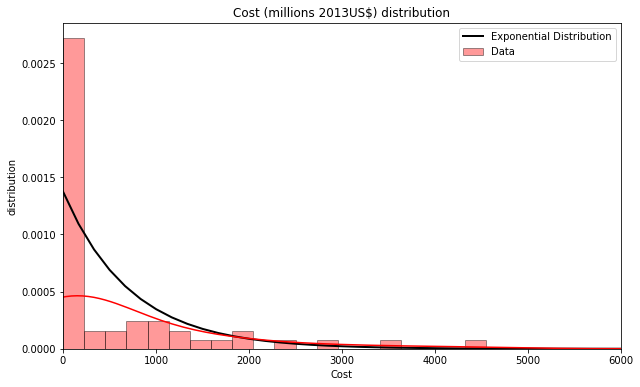

In [69]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', UserWarning)

range_var = np.linspace(y.min(),y.max())
plt.figure(figsize=(10,6))
exp_y = lam* np.exp(-(lam*range_var)) #Get exponential distribution
plt.plot(range_var,exp_y, color='black', label='Exponential Distribution', linewidth=2)

#plot histogram and density of data
sns.distplot(y, hist=True, kde=True,
                bins=int(180/5), color = 'red',
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 1.5}, label='Data')



plt.title('Cost (millions 2013US$) distribution')
plt.legend()
plt.xlabel('Cost')
plt.ylabel('distribution')
#limit x axis from 0
plt.xlim(0,6000)
plt.show()


3. We seek to estimate the expected cost:
$$g(θ) = \frac{1}{\theta}$$
Let:
$$\hat{g}(x) = \frac{1}{n}\sum\limits_{i=1}^{n}X_i$$
Show that ĝ is an efficient estimator of g(θ).


Since $\mathbb{E}[T_1(X)] = \dfrac{1}{n} \sum_{i=1}^n \mathbb{E}[X_i] = \dfrac{1}{\lambda} = \mathbb{E}[g_1(\lambda)]$, the estimator is unbiased.

$$ \mathbb{V}ar[T_1(X)] = \dfrac{1}{n^2} \sum_{i=1}^{n} \mathbb{V}ar[X_i] =\dfrac{n}{n^2\lambda^2} = \dfrac{1}{n\lambda^2} $$

The risk is, then, given by:
 $$R(T_1, \lambda) = \dfrac{1}{n\lambda^2} $$

The Cramer-Rao bound is given by:
$$\mathbb{V}ar[T_1(X)] = \dfrac{(g_1'(\lambda))^2}{nI_1(\lambda)}$$
Where $I_1$ is the Fisher information for one sample in the reguler model, given by:
$$I_1(\lambda) = \mathbb{V}ar\left[\dfrac{\partial log p(X_1, \lambda)}{\partial \lambda} \right] = \mathbb{V}ar \left[\dfrac{1}{\lambda} - X_1 \right] = \mathbb{V}ar[X_1] = \dfrac{1}{\lambda^2}  $$
We know that $T_1(X)$ is an efficient estimator for $g_1(\lambda)$ if it is unbiased and its variance respects the Cramer-Rao bound. Therefore, we have:

$$ g_1(\lambda) = \dfrac{1}{\lambda} $$ 
$$g_1'(\lambda) = -\dfrac{1}{\lambda^2} \implies (g_1'(\lambda))^2 = \dfrac{1}{\lambda^4} $$

$$\dfrac{g_1'(\lambda)^2}{nI_1(\lambda)} = \dfrac{1}{\lambda^4} \dfrac{\lambda^2}{n} = \dfrac{1}{n \lambda^2} = \mathbb{V}ar[T_1(X)]
$$

4. Compute ĝ(x) from the available observations.

In [78]:
g = sum(y)/len(y)
print ('ĝ(X) = ' + str(g))

ĝ(X) = 726.3363636363636


5. For any η > 0, define the estimator
$$ĝ_η = ηĝ$$
Show that for some values of η (to be specified), the quadratic risks associated with the
estimation of g(θ) satisfy R(θ, $ĝ_η$ ) < R(θ, ĝ) for all θ > 0. Discuss this result.

Since:


$$\forall \lambda > 0, n > 0$$

$$R(\lambda, T_{1, \eta}) = (b(\lambda, T_{1, \eta}))^2 + \mathbb{V}ar_{\lambda}( T_{1, \eta}(X))$$

To calculate the bias, we have:
$$\mathbb{E}[ T_{1, \eta}] = \eta \mathbb{E}[T_1(X)] = \dfrac{\eta}{\lambda}$$

Therefore:


$$ (b(\lambda, T_{1, \eta}))^2 = \left(\dfrac{\eta}{\lambda} - \dfrac{1}{\lambda} \right)^2 = \dfrac{(\eta - 1)^2}{\lambda^2}$$

For the variance, we have:


$$\mathbb{V}ar_{\lambda}( T_{1, \eta}(X)) = \eta^2 * \mathbb{V}ar[T_1(X)] = \dfrac{\eta^2}{n\lambda^2}$$

Finally, the risk is given by:
$$
R(\lambda, T_{1, \eta}) = (b(\lambda,T_{1, \eta}))^2 + \mathbb{V}ar_{\lambda}(T_{1, \eta}(X)) = \dfrac{\eta^2}{n\lambda^2} + \dfrac{(n-1)^2}{\lambda^2}
$$

$$R(\lambda, T_{1, \eta}) = \dfrac{1}{\lambda^2} \left( \left(1+\dfrac{1}{n} \right) \eta^2 - 2\eta + 1 \right)$$


Since the goal is to find $\eta$ such that $\forall \lambda > 0, R(\lambda, T_{1, \eta}) < R(\lambda, T_1)$, we have:

$$R(\lambda, T_{1, \eta}) < \dfrac{1}{\lambda^2 n}$$



Since $\lambda^2 > 0$, we have:
$$\left(1+\dfrac{1}{n} \right) \eta^2 - 2\eta + 1 - \dfrac{1}{n} < 0$$

Solving the inequation:

$$\Delta = 2² - 4\left(1 + \dfrac{1}{n} \right) \left(1 - \dfrac{1}{n} \right) = 4\dfrac{1}{n^2} = \dfrac{4}{n^2}$$

$$\eta = \dfrac{2 \pm 2/n}{2+2/n} $$


$$
\eta_1 = \dfrac{2 - 2/n}{2+2/n} = \dfrac{n - 1}{n + 1}, \eta_2 = \dfrac{2 + 2/n}{2+2/n} = 1
$$


Since $ \left(1 + \dfrac{1}{n}\right) > 0$, we have:

$$ \dfrac{n - 1}{n + 1} < \eta < 1 \iff  R(\lambda, T_{1, \eta}) < R(\lambda, T_1)$$

Since an effective estimator must be U.V.M.B (Uniformément de Variance Minimale dans la classe des estimateur sans Biais) according to corollary 3.2.7 of the poly. Therefore, although $ \forall \lambda > 0, R(\lambda, T_{1, \eta}) < R(\lambda, T_1)$ is valid for some values of $\eta$, we have:
$$  T_{1, \eta} \notin \Gamma$$ 
Since 
$$ b(\lambda, \widetilde T_{1, \eta}) \neq 0, \forall \eta \neq 1$$
For $\eta = 1$, we have:
$$ \widetilde T_{1, \eta} = T_1$$
$$R(\lambda,  T_{1, \eta}) = R(\lambda, T_1)$$

Therefore, the proposition is coherent.

6. Give η so that $ĝ_η$ is an unbiased estimator of the median cost. Compute $ĝ_η$ (x) from the
available observations. Compare with the empirical median.

We have:
$$\mathbb{P}_\lambda (X_1 > m) = 0.5$$
Where m is the median.
Therefore:

$$e^{-\lambda m} = 0.5$$

$$log(0.5) = -\lambda m$$

$$m = \dfrac{-log(0.5)}{\lambda} = \dfrac{log(2)}{\lambda}$$

Our goal is to etimate $g_2(\lambda) = \dfrac{log(2)}{\lambda}$ = m with the estimator $ T_{1, \eta}$ such that $ b(\lambda, T_{1, \eta}) = 0$. Therefore:

$$ b(\lambda,  T_{1, \eta}) = \mathbb{E}[ T_{1, \eta}] - \dfrac{log(2)}{\lambda} = 0$$

$$ \mathbb{E}[ T_{1, \eta}] = \dfrac{log(2)}{\lambda} $$

$$\dfrac{\eta}{\lambda} = \dfrac{log(2)}{\lambda} $$

$$ \eta = log(2) $$


In [97]:
print('Estimateur de la médiane = ' + str(np.log(2)*g))
print('Médiane empirique = ' + str(y.median()))

Estimateur de la médiane = 503.45800259270857
Médiane empirique = 89.9


7. For the previous value of η, compare the quadratic risks of ĝ and $ĝ_η$ , both viewed as
estimators of g(θ), depending on the number of samples n.

$$ R(\lambda, T_1) = \dfrac{1}{\lambda^2 n}$$

$$ R(\lambda, T_{1, \eta})  =\dfrac{1}{\lambda^2}\left( \left(1 + \dfrac{1}{n} \right) log^2(2) - 2log(2) + 1 \right) $$

Therefore, for small values of n, $ R(\lambda,  T_{1, log(2)}) < R(\lambda, T_1) $, since until n = 5, we have:
$$\dfrac{n - 1}{n + 1} < \eta = log(2) < 1 $$

However, for bigger values of n, $ R(\lambda, T_1) $ tend vers 0 et $ R(\lambda, T_{1, \eta})$ tends to:
$$ \dfrac{1}{\lambda^2}\left(log^2(2) - 2log(2) + 1 \right) \approx \dfrac{0.094158653}{\lambda^2} $$

*Exercise 3*

1. Give the null hypothesis $H_0$ and the alternative hypothesis $H_1$ as subsets of Θ.

Being $T(X) = \sum_{i=1}^n Xi $ a scalar statistic, where $X_i$ is each sample:

Since there is a total of 55 accidents, it is possible to conclude that affirming that the average cost of an accident is inferior to 1 billion dolars is the same as affirming that $T(X)$ is inferior than 55 billion dolars.

Therefore, the hypotheses are:

$$H_0: T(X)\geq 55 \cdot 10^9 dollars $$
$$H_1: T(X)< 55 \cdot 10^9 dollars $$

2. Using Neyman-Pearson’s approach, give a uniformly most powerful test at level α.



Being $Z_{\theta, \theta'}(X)$ the likelihood ratio, we have:




$$ Z_{\theta, \theta'} (X) = \dfrac{\theta'^n  e^{-\theta' \sum_{i=1}^n Xi}}{\theta^n e^{-\theta \sum_{i=1}^n Xi}} 
= \dfrac{\theta'^n e^{-\theta' T(X)}}{\theta^n e^{-\theta T(X)}}
= \left(\dfrac{\theta'}{\theta}\right)^n  e^{(\theta - \theta') T(X)}
$$

Therefore, $Z_{\theta, \theta'}$ is a strictly decreasing function of $T(X)$ $\forall$ $\theta, \theta' | (\theta' > 0  ,  \theta>0)$,which verifies the MON condition explained in the section 5.5 of the poly.

Using the theorem presented in the theorem 5.5.2 of the poly, it is possible to adapt the increasing function shown in the poly to the case of our monotonic decreasing function $Z_{\theta, \theta'}$. Therefore, we have:

Being $\theta_0 \in \Theta, \alpha \in (0,1)$ and $ c $ | $P_{\theta_0} (T(X) < c) = \alpha$

This way, the hypothesis $H_0 = {\theta \geq \theta_0}$ against the alternative $H_1 = {\theta < \theta_0}$ defined by:
$$
\begin{equation*}
    \delta(x) = \begin{cases}
               1               & \text{si } T(X) < c\\
               0               & \text{si } T(X) \geq c\\
           \end{cases}
\end{equation*}
$$
Is uniformly most powerful at level $\alpha$.

That said, the sum of n independent exponential random variables identically distributed with parameter $\lambda$ is a random variable with a Gamma distribution with parameters $k = n$ and $\theta = \lambda^{-1}$.

3. Apply the test at level α = 5%. Give the p-value and conclude.

In [16]:
pvalue = stat.gamma.cdf(x=sum(y), a=len(y), scale=1000)
print('p-value: ' + str(pvalue))

p-value: 0.013717486423264867


Therefore, it is not possible to conclude that the average cost of an accidenthe is inferior to 1 billion dolars, since the samples can always have a mean distant from the distribution's mean, so $H_0$ can be rejected.

If $H_0$ is not rejected, there is a chance equivalent to the p-value shown above to observe T(X) in question, so $H_0$ will be rejected, since $\alpha$ is equal to 0.05.

4. For n = 55 samples and the parameter θ associated with an expected cost of one billion
dollars, plot the probability density function of ĝ(X) and show the rejection region of
$H_0$ at level α = 5%.

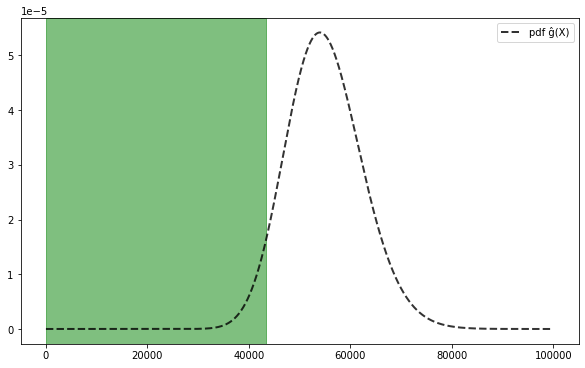

Rejection threshold: 43395.81385987552


In [32]:
x_alpha = stat.gamma.ppf(q=0.05, a=y.shape[0], scale=1000)
ax_x = list(range(0, 100000))
ax_x = [i for i in ax_x]
ax_y = stat.gamma.pdf(x=ax_x, a=y.shape[0], scale=1000)

plt.figure(figsize=(10,6))
plt.plot(ax_x, ax_y, color='black', label='pdf ĝ(X)', linewidth=2, alpha=.8, linestyle='--')
plt.axvspan(0, x_alpha, alpha=0.5, color='green')
plt.legend()
plt.show()
print ('Rejection threshold: ' + str(x_alpha))

5. Plot the power of the test at level α with respect to θ for n = 10, 50, 100, 1000 samples.
Explain the results.

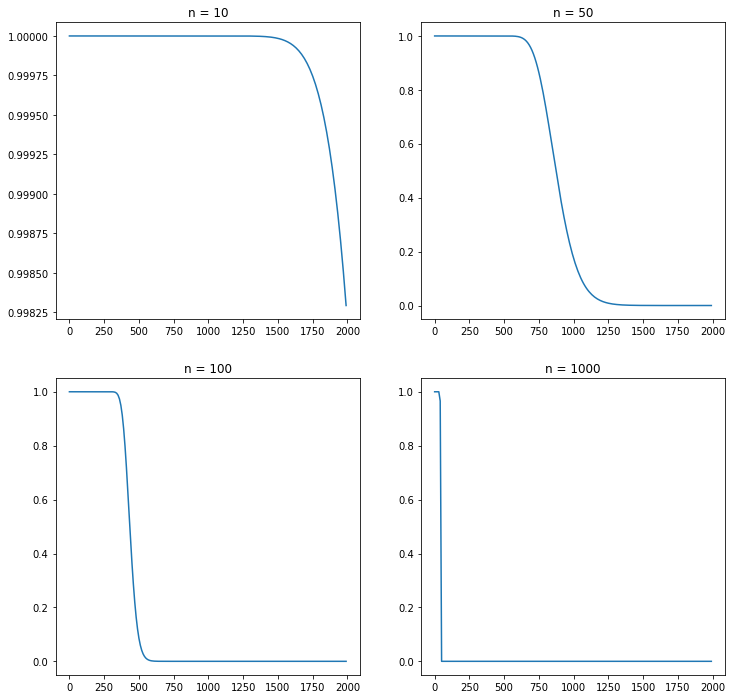

In [65]:
thetas = list(range(1, 2000, 10))
n = [10, 50, 100, 100]
fig, ax = plt.subplots(2,2 , figsize=(12, 12))
ax[0,0].plot(thetas, stat.gamma.cdf(x=x_alpha, a=10, scale=thetas))
ax[0,0].set_title('n = 10')
ax[0,1].plot(thetas, stat.gamma.cdf(x=x_alpha, a=50, scale=thetas))
ax[0,1].set_title('n = 50')
ax[1,0].plot(thetas, stat.gamma.cdf(x=x_alpha, a=100, scale=thetas))
ax[1,0].set_title ('n = 100')
ax[1,1].plot(thetas, stat.gamma.cdf(x=x_alpha, a=1000, scale=thetas))
ax[1,1].set_title ('n = 1000')
plt.show()

6. Propose a new test using the approximation of ĝ(X) suggested by the Central Limit
Theorem and give the result of this test.

Being

$ \mu = $ 1 billion dolars, $ \sigma$ = standard deviation of $T_1$ for the samples

$ T_1$ ~ $N(\mu, \frac{\sigma}{\sqrt{n}}) $

We have:

$$ \mathbb{P} (T_1 < T_1(X)) = \mathbb{P} \left(\dfrac{T_1 - \mu}{\sigma / \sqrt(n)} < \dfrac{T_1(X) - \mu}{\sigma / \sqrt(n)}  \right) \approx \mathbb{P} \left( N(0, 1) < \dfrac{T_1(X) - \mu}{\sigma / \sqrt(n)}  \right)  $$

In [109]:
sigma = np.std(y, ddof=1)

sigma_n= (g - 1000)/ (sigma/len(y)**(1/2))

print(stat.norm.cdf(sigma_n))


0.07442891171163017


$ \mathbb{P} \left( N(0, 1) < \dfrac{T_1(X) - \mu}{\frac{\sigma}{\sqrt(n)}}  \right) = 0.07442891171163 > \alpha = 0.05 $

Therefore, it is not possible to reject $H_0$ this way, since it is now higher than $\alpha$